In [207]:
import numpy as np
import pandas as pd
import nltk



In [208]:
df = pd.read_csv('spam.csv',encoding='latin-1')

In [209]:
df.sample(5)

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
4839,spam,PRIVATE! Your 2003 Account Statement for shows...,NaN,NaN,NaN
669,ham,Did u receive my msg?,NaN,NaN,NaN
5521,ham,You are a big chic. Common. Declare,NaN,NaN,NaN
4853,ham,"Also north carolina and texas atm, you would j...",NaN,NaN,NaN
354,ham,&lt;#&gt; ISH MINUTES WAS 5 MINUTES AGO. WTF.,NaN,NaN,NaN


In [210]:
df.shape

(5572, 5)

In [211]:
# 1. Data cleaning
# 2. EDA
# 3. Text Preprocessing
# 4. Model building
# 5. Evaluation
# 6. Improvement
# 7. Website
# 8. Deploy

## 1. Data Cleaning

In [212]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [213]:
# drop last 3 cols
df.drop(columns=['Unnamed: 2','Unnamed: 3','Unnamed: 4'],inplace=True)

In [214]:
df.sample(5)

,v1,v2
2218,ham,Nice talking to you! please dont forget my pix...
1715,ham,Asking do u knw them or nt? May be ur frnds or...
738,ham,Wish i were with you now!
925,ham,"K, wait chikku..il send aftr &lt;#&gt; mins"
5405,ham,So how many days since then?


In [215]:
# renaming the cols
df.rename(columns={'v1':'target','v2':'text'},inplace=True)
df.sample(5)

,target,text
2551,ham,I'm done. C Ì_ there.
4934,ham,"Hey babe, how's it going ? Did you ever figure..."
1889,ham,I gotta collect da car at 6 lei.
1526,ham,"Wow ... I love you sooo much, you know ? I can..."
3174,spam,UR GOING 2 BAHAMAS! CallFREEFONE 08081560665 a...


In [216]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()

In [217]:
df['target'] = encoder.fit_transform(df['target'])

In [218]:
df.head()

,target,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [219]:
# missing values
df.isnull().sum()

target    0
text      0
dtype: int64

In [220]:
# check for duplicate values
df.duplicated().sum()

np.int64(403)

In [221]:
# remove duplicates
df = df.drop_duplicates(keep='first')

In [222]:
df.duplicated().sum()

np.int64(0)

In [223]:
df.shape

(5169, 2)

## 2.EDA

In [224]:
df.head()

,target,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [225]:
df['target'].value_counts()

target
0    4516
1     653
Name: count, dtype: int64

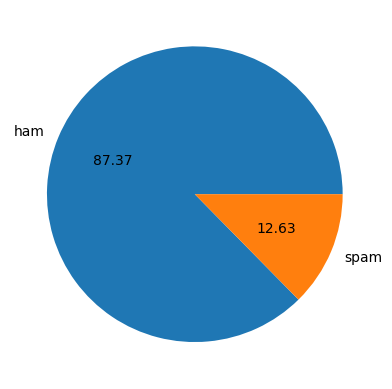

In [226]:
import matplotlib.pyplot as plt
plt.pie(df['target'].value_counts(), labels=['ham','spam'],autopct="%0.2f")
plt.show()

In [227]:
import nltk
nltk.data.path


['C:\\Users\\aparn/nltk_data',
 'c:\\Users\\aparn\\AppData\\Local\\Programs\\Python\\Python312\\nltk_data',
 'c:\\Users\\aparn\\AppData\\Local\\Programs\\Python\\Python312\\share\\nltk_data',
 'c:\\Users\\aparn\\AppData\\Local\\Programs\\Python\\Python312\\lib\\nltk_data',
 'C:\\Users\\aparn\\AppData\\Roaming\\nltk_data',
 'C:\\nltk_data',
 'D:\\nltk_data',
 'E:\\nltk_data',
 'C:\\Users\\aparn/nltk_data',
 'C:\\Users\\aparn\\AppData\\Roaming\\nltk_data']

In [228]:
nltk.download('punkt')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\aparn\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\aparn\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [229]:
df['num_characters'] = df['text'].apply(len)

In [230]:
df.head()

,target,text,num_characters
0,0,"Go until jurong point, crazy.. Available only ...",111
1,0,Ok lar... Joking wif u oni...,29
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,0,U dun say so early hor... U c already then say...,49
4,0,"Nah I don't think he goes to usf, he lives aro...",61


In [231]:
import re
df['num_words'] = df['text'].apply(lambda x: len(re.findall(r'\b\w+\b', x)))


In [232]:
df.head()

,target,text,num_characters,num_words
0,0,"Go until jurong point, crazy.. Available only ...",111,20
1,0,Ok lar... Joking wif u oni...,29,6
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,33
3,0,U dun say so early hor... U c already then say...,49,11
4,0,"Nah I don't think he goes to usf, he lives aro...",61,14


In [233]:
df['num_sentences'] = df['text'].apply(lambda x: len(re.findall(r'(?<!\w\.\w.)(?<![A-Z][a-z]\.)(?<=\.|\?|\!)\s', x)) + 1)


In [234]:
df.head()

,target,text,num_characters,num_words,num_sentences
0,0,"Go until jurong point, crazy.. Available only ...",111,20,3
1,0,Ok lar... Joking wif u oni...,29,6,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,33,2
3,0,U dun say so early hor... U c already then say...,49,11,2
4,0,"Nah I don't think he goes to usf, he lives aro...",61,14,1


In [235]:
df[['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,5169.000000,5169.000000,5169.000000
mean,78.977945,15.989940,2.084736
std,58.236293,11.518372,1.518136
min,2.000000,0.000000,1.000000
25%,36.000000,8.000000,1.000000
50%,60.000000,12.000000,2.000000
75%,117.000000,23.000000,3.000000
max,910.000000,190.000000,39.000000


In [236]:
# ham
df[df['target'] == 0][['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,4516.000000,4516.000000,4516.000000
mean,70.459256,14.600974,1.946856
std,56.358207,11.448193,1.460385
min,2.000000,0.000000,1.000000
25%,34.000000,7.000000,1.000000
50%,52.000000,11.000000,1.000000
75%,90.000000,19.000000,2.000000
max,910.000000,190.000000,39.000000


In [237]:
#spam
df[df['target'] == 1][['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,653.000000,653.000000,653.000000
mean,137.891271,25.595712,3.038285
std,30.137753,6.185684,1.567521
min,13.000000,2.000000,1.000000
25%,132.000000,24.000000,2.000000
50%,149.000000,27.000000,3.000000
75%,157.000000,29.000000,4.000000
max,224.000000,40.000000,9.000000


In [238]:
import seaborn as sns

<Axes: xlabel='num_characters', ylabel='Count'>

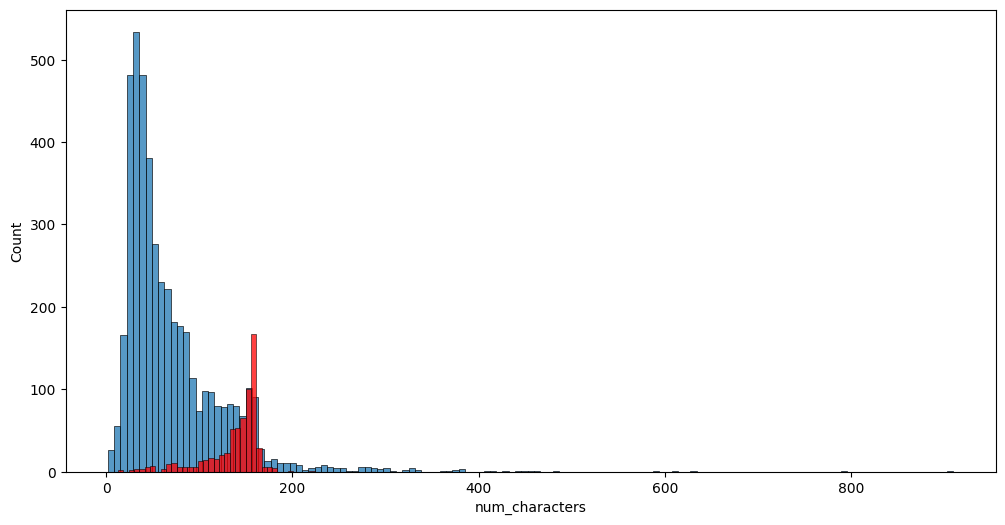

In [239]:
plt.figure(figsize=(12,6))
sns.histplot(df[df['target'] == 0]['num_characters'])
sns.histplot(df[df['target'] == 1]['num_characters'],color='red')

<Axes: xlabel='num_words', ylabel='Count'>

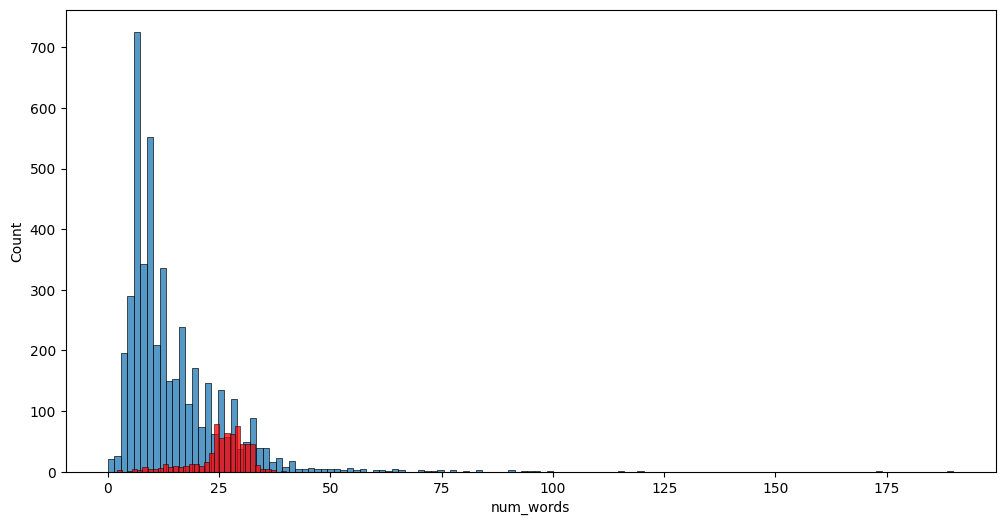

In [240]:
plt.figure(figsize=(12,6))
sns.histplot(df[df['target'] == 0]['num_words'])
sns.histplot(df[df['target'] == 1]['num_words'],color='red')

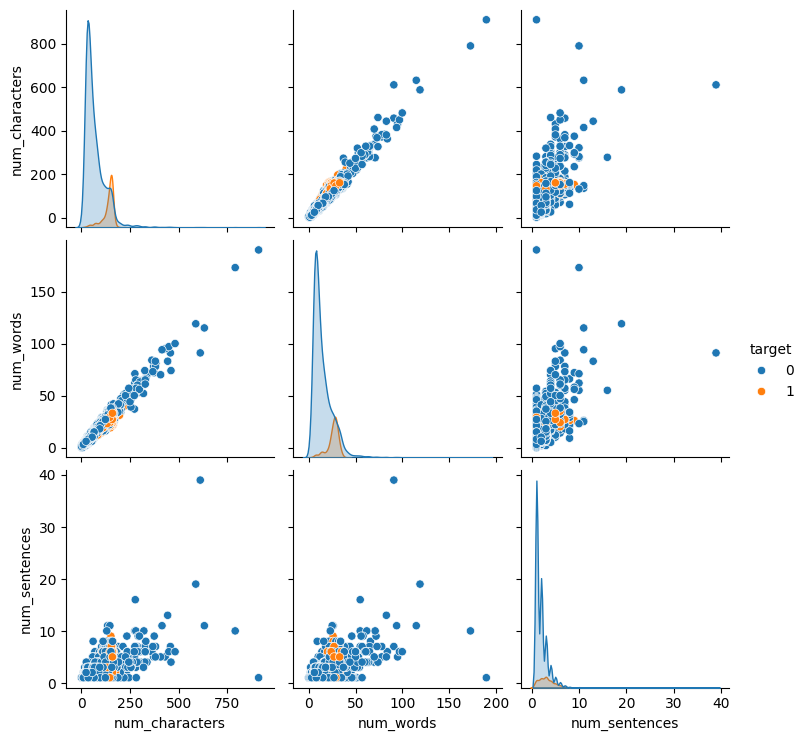

In [241]:
sns.pairplot(df,hue='target')

<Axes: >

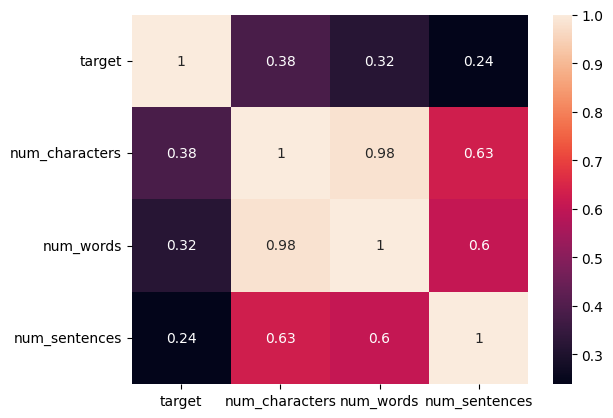

In [242]:
sns.heatmap(df.select_dtypes(include='number').corr(), annot=True)


## 3. Data Preprocessing
- Lower case
- Tokenization
- Removing special characters
- Removing stop words and punctuation
- Stemming

In [243]:
nltk.download('stopwords')
from nltk.corpus import stopwords
stopwords.words('english')


import string

def transform_text(text):
    text = text.lower()
    text = nltk.word_tokenize(text)
    
    y = []
    for i in text:
        if i.isalnum():
            y.append(i)
    
    text = y[:]
    y.clear()
    
    for i in text:
        if i not in stopwords.words('english') and i not in string.punctuation:
            y.append(i)
            
    text = y[:]
    y.clear()
    
    for i in text:
        y.append(ps.stem(i))
    
            
    return " ".join(y)

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\aparn\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [244]:
import string
from sklearn.feature_extraction.text import ENGLISH_STOP_WORDS
from nltk.stem.snowball import SnowballStemmer

stemmer = SnowballStemmer("english")

def transform_text(text):
    # Lowercase
    text = text.lower()

    # Remove special characters and tokenize
    words = re.findall(r'\b\w+\b', text)
    # Remove stopwords and punctuation
    words = [word for word in words if word not in ENGLISH_STOP_WORDS and word not in string.punctuation]

    # Stemming
    words = [stemmer.stem(word) for word in words]

    return " ".join(words)


In [245]:
df['text'][10]

"I'm gonna be home soon and i don't want to talk about this stuff anymore tonight, k? I've cried enough today."

In [246]:
df['transformed_text'] = df['text'].apply(transform_text)

In [247]:
df.head()

,target,text,num_characters,num_words,num_sentences,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,20,3,jurong point crazi avail bugi n great world la...
1,0,Ok lar... Joking wif u oni...,29,6,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,33,2,free entri 2 wkli comp win fa cup final tkts 2...
3,0,U dun say so early hor... U c already then say...,49,11,2,u dun say earli hor u c say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,14,1,nah don t think goe usf live


In [248]:
from wordcloud import WordCloud
wc = WordCloud(width=500,height=500,min_font_size=10,background_color='white')

In [249]:
spam_wc = wc.generate(df[df['target'] == 1]['transformed_text'].str.cat(sep=" "))

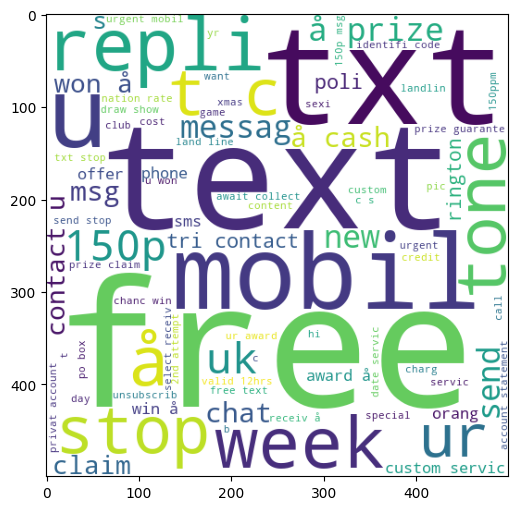

In [250]:
plt.figure(figsize=(15,6))
plt.imshow(spam_wc)

In [251]:
ham_wc = wc.generate(df[df['target'] == 0]['transformed_text'].str.cat(sep=" "))

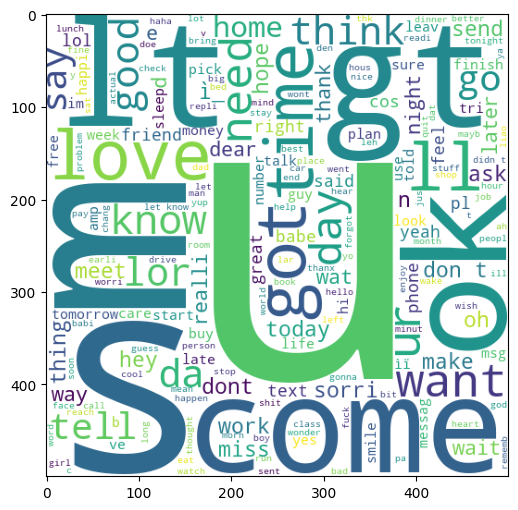

In [252]:
plt.figure(figsize=(15,6))
plt.imshow(ham_wc)

In [253]:
df.head()

,target,text,num_characters,num_words,num_sentences,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,20,3,jurong point crazi avail bugi n great world la...
1,0,Ok lar... Joking wif u oni...,29,6,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,33,2,free entri 2 wkli comp win fa cup final tkts 2...
3,0,U dun say so early hor... U c already then say...,49,11,2,u dun say earli hor u c say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,14,1,nah don t think goe usf live


In [254]:
spam_corpus = []
for msg in df[df['target'] == 1]['transformed_text'].tolist():
    for word in msg.split():
        spam_corpus.append(word)
        

In [255]:
len(spam_corpus)

11402

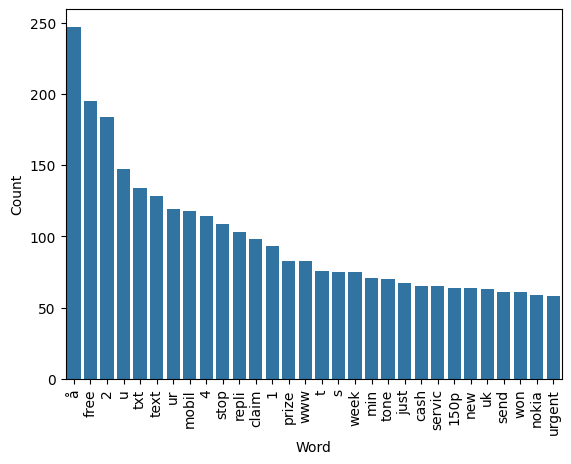

In [256]:
from collections import Counter
word_counts = Counter(spam_corpus)

word_counts_df = pd.DataFrame(word_counts.most_common(30), columns=['Word', 'Count'])

sns.barplot(x='Word', y='Count', data=word_counts_df)
plt.xticks(rotation='vertical')
plt.show()

In [257]:
ham_corpus = []
for msg in df[df['target'] == 0]['transformed_text'].tolist():
    for word in msg.split():
        ham_corpus.append(word)

In [258]:
len(ham_corpus)

34954

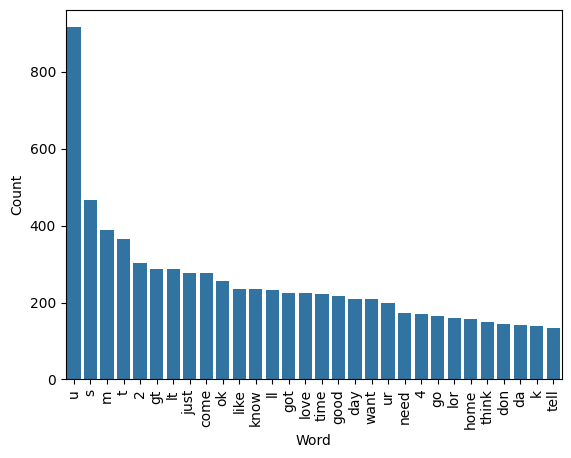

In [259]:
from collections import Counter
word_counts = Counter(ham_corpus)

word_counts_df = pd.DataFrame(word_counts.most_common(30), columns=['Word', 'Count'])

sns.barplot(x='Word', y='Count', data=word_counts_df)
plt.xticks(rotation='vertical')
plt.show()

In [260]:
df.head()

,target,text,num_characters,num_words,num_sentences,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,20,3,jurong point crazi avail bugi n great world la...
1,0,Ok lar... Joking wif u oni...,29,6,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,33,2,free entri 2 wkli comp win fa cup final tkts 2...
3,0,U dun say so early hor... U c already then say...,49,11,2,u dun say earli hor u c say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,14,1,nah don t think goe usf live


## 4. Model Building

In [261]:
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
cv = CountVectorizer()
tfidf = TfidfVectorizer(max_features=3000)

In [262]:
X = tfidf.fit_transform(df['transformed_text']).toarray()

In [263]:
X.shape

(5169, 3000)

In [264]:
y = df['target'].values

In [265]:
from sklearn.model_selection import train_test_split

In [266]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=2)

In [267]:
from sklearn.naive_bayes import GaussianNB,MultinomialNB,BernoulliNB
from sklearn.metrics import accuracy_score,confusion_matrix,precision_score

In [268]:
gnb = GaussianNB()
mnb = MultinomialNB()
bnb = BernoulliNB()

In [269]:
gnb.fit(X_train,y_train)
y_pred1 = gnb.predict(X_test)
print(accuracy_score(y_test,y_pred1))
print(confusion_matrix(y_test,y_pred1))
print(precision_score(y_test,y_pred1))

0.8713733075435203
[[782 114]
 [ 19 119]]
0.5107296137339056


In [270]:
mnb.fit(X_train,y_train)
y_pred2 = mnb.predict(X_test)
print(accuracy_score(y_test,y_pred2))
print(confusion_matrix(y_test,y_pred2))
print(precision_score(y_test,y_pred2))

0.9787234042553191
[[896   0]
 [ 22 116]]
1.0


In [271]:
bnb.fit(X_train,y_train)
y_pred3 = bnb.predict(X_test)
print(accuracy_score(y_test,y_pred3))
print(confusion_matrix(y_test,y_pred3))
print(precision_score(y_test,y_pred3))

0.9864603481624759
[[895   1]
 [ 13 125]]
0.9920634920634921


In [272]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier

In [273]:
svc = SVC(kernel='sigmoid', gamma=1.0)
knc = KNeighborsClassifier()
mnb = MultinomialNB()
dtc = DecisionTreeClassifier(max_depth=5)
lrc = LogisticRegression(solver='liblinear', penalty='l1')
rfc = RandomForestClassifier(n_estimators=50, random_state=2)
abc = AdaBoostClassifier(n_estimators=50, random_state=2)
bc = BaggingClassifier(n_estimators=50, random_state=2)
etc = ExtraTreesClassifier(n_estimators=50, random_state=2)
gbdt = GradientBoostingClassifier(n_estimators=50,random_state=2)
xgb = XGBClassifier(n_estimators=50,random_state=2)

In [274]:
clfs = {
    'SVC' : svc,
    'KN' : knc, 
    'NB': mnb, 
    'DT': dtc, 
    'LR': lrc, 
    'RF': rfc, 
    'AdaBoost': abc, 
    'BgC': bc, 
    'ETC': etc,
    'GBDT':gbdt,
    'xgb':xgb
}

In [275]:
def train_classifier(clf,X_train,y_train,X_test,y_test):
    clf.fit(X_train,y_train)
    y_pred = clf.predict(X_test)
    accuracy = accuracy_score(y_test,y_pred)
    precision = precision_score(y_test,y_pred)
    
    return accuracy,precision

In [276]:
train_classifier(svc,X_train,y_train,X_test,y_test)

(0.97678916827853, 0.975)

In [277]:
accuracy_scores = []
precision_scores = []

for name,clf in clfs.items():
    
    current_accuracy,current_precision = train_classifier(clf,X_train,y_train,X_test,y_test)
    
    print("For ",name)
    print("Accuracy - ",current_accuracy)
    print("Precision - ",current_precision)
    
    accuracy_scores.append(current_accuracy)
    precision_scores.append(current_precision)

For  SVC
Accuracy -  0.97678916827853
Precision -  0.975
For  KN
Accuracy -  0.9042553191489362
Precision -  1.0
For  NB
Accuracy -  0.9787234042553191
Precision -  1.0
For  DT
Accuracy -  0.9264990328820116
Precision -  0.8974358974358975
For  LR
Accuracy -  0.9555125725338491
Precision -  0.9509803921568627
For  RF
Accuracy -  0.9748549323017408
Precision -  0.9745762711864406
For  AdaBoost
Accuracy -  0.8945841392649904
Precision -  0.8918918918918919
For  BgC
Accuracy -  0.971953578336557
Precision -  0.9291338582677166
For  ETC
Accuracy -  0.9806576402321083
Precision -  0.9758064516129032
For  GBDT
Accuracy -  0.9468085106382979
Precision -  1.0
For  xgb
Accuracy -  0.9787234042553191
Precision -  0.9754098360655737


In [278]:
performance_df = pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy':accuracy_scores,'Precision':precision_scores}).sort_values('Precision',ascending=False)

In [279]:
performance_df

,Algorithm,Accuracy,Precision
1,KN,0.904255,1.000000
2,NB,0.978723,1.000000
9,GBDT,0.946809,1.000000
8,ETC,0.980658,0.975806
10,xgb,0.978723,0.975410
0,SVC,0.976789,0.975000
5,RF,0.974855,0.974576
4,LR,0.955513,0.950980
7,BgC,0.971954,0.929134
3,DT,0.926499,0.897436


In [280]:
performance_df1 = pd.melt(performance_df, id_vars = "Algorithm")

In [281]:
performance_df1

,Algorithm,variable,value
0,KN,Accuracy,0.904255
1,NB,Accuracy,0.978723
2,GBDT,Accuracy,0.946809
3,ETC,Accuracy,0.980658
4,xgb,Accuracy,0.978723
5,SVC,Accuracy,0.976789
6,RF,Accuracy,0.974855
7,LR,Accuracy,0.955513
8,BgC,Accuracy,0.971954
9,DT,Accuracy,0.926499


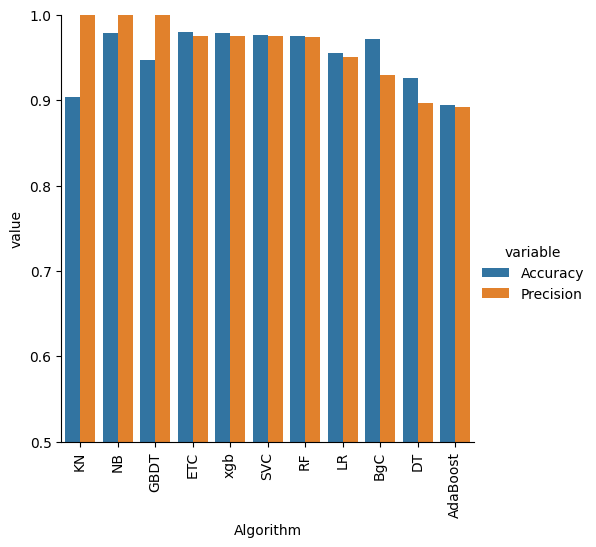

In [282]:
sns.catplot(x = 'Algorithm', y='value', 
               hue = 'variable',data=performance_df1, kind='bar',height=5)
plt.ylim(0.5,1.0)
plt.xticks(rotation='vertical')
plt.show()

In [283]:
temp_df = pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy_max_ft_3000':accuracy_scores,'Precision_max_ft_3000':precision_scores}).sort_values('Precision_max_ft_3000',ascending=False)

In [284]:
temp_df = pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy_scaling':accuracy_scores,'Precision_scaling':precision_scores}).sort_values('Precision_scaling',ascending=False)

In [285]:
new_df = performance_df.merge(temp_df,on='Algorithm')

In [286]:
new_df_scaled = new_df.merge(temp_df,on='Algorithm')

In [287]:
temp_df = pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy_num_chars':accuracy_scores,'Precision_num_chars':precision_scores}).sort_values('Precision_num_chars',ascending=False)

In [288]:
new_df_scaled.merge(temp_df,on='Algorithm')

,Algorithm,Accuracy,Precision,Accuracy_scaling_x,Precision_scaling_x,Accuracy_scaling_y,Precision_scaling_y,Accuracy_num_chars,Precision_num_chars
0,KN,0.904255,1.000000,0.904255,1.000000,0.904255,1.000000,0.904255,1.000000
1,NB,0.978723,1.000000,0.978723,1.000000,0.978723,1.000000,0.978723,1.000000
2,GBDT,0.946809,1.000000,0.946809,1.000000,0.946809,1.000000,0.946809,1.000000
3,ETC,0.980658,0.975806,0.980658,0.975806,0.980658,0.975806,0.980658,0.975806
4,xgb,0.978723,0.975410,0.978723,0.975410,0.978723,0.975410,0.978723,0.975410
5,SVC,0.976789,0.975000,0.976789,0.975000,0.976789,0.975000,0.976789,0.975000
6,RF,0.974855,0.974576,0.974855,0.974576,0.974855,0.974576,0.974855,0.974576
7,LR,0.955513,0.950980,0.955513,0.950980,0.955513,0.950980,0.955513,0.950980
8,BgC,0.971954,0.929134,0.971954,0.929134,0.971954,0.929134,0.971954,0.929134
9,DT,0.926499,0.897436,0.926499,0.897436,0.926499,0.897436,0.926499,0.897436


In [289]:
svc = SVC(kernel='sigmoid', gamma=1.0,probability=True)
mnb = MultinomialNB()
etc = ExtraTreesClassifier(n_estimators=50, random_state=2)

from sklearn.ensemble import VotingClassifier

In [290]:
voting = VotingClassifier(estimators=[('svm', svc), ('nb', mnb), ('et', etc)],voting='soft')

In [291]:
voting.fit(X_train,y_train)

,estimators,"[('svm', ...), ('nb', ...), ...]"
,voting,'soft'
,weights,None
,n_jobs,None
,flatten_transform,True
,verbose,False
,C,1.0
,kernel,'sigmoid'
,degree,3
,gamma,1.0
,coef0,0.0


In [292]:
y_pred = voting.predict(X_test)
print("Accuracy",accuracy_score(y_test,y_pred))
print("Precision",precision_score(y_test,y_pred))

Accuracy 0.9835589941972921
Precision 0.991869918699187


In [293]:
estimators=[('svm', svc), ('nb', mnb), ('et', etc)]
final_estimator=RandomForestClassifier()

In [294]:
from sklearn.ensemble import StackingClassifier

In [295]:
clf = StackingClassifier(estimators=estimators, final_estimator=final_estimator)

In [296]:
clf.fit(X_train,y_train)
y_pred = clf.predict(X_test)
print("Accuracy",accuracy_score(y_test,y_pred))
print("Precision",precision_score(y_test,y_pred))

Accuracy 0.9864603481624759
Precision 0.9696969696969697


In [297]:
import pickle
pickle.dump(tfidf,open('vectorizer.pkl','wb'))
pickle.dump(mnb,open('model.pkl','wb'))